In [1]:
# Load and Explore the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("blogs (1).csv")

In [4]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
# Data Preprocessing

In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    text = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

In [9]:
# Sample DataFrame
data = {'Data': ['Hello World! Visit https://example.com', 
                 'Python is #1 in programming.', 
                 'Email me at example@example.com']}
df = pd.DataFrame(data)

In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [11]:
df['Cleaned_Data'] = df['Data'].apply(clean_text)
print(df)

                                     Data                   Cleaned_Data
0  Hello World! Visit https://example.com              hello world visit
1            Python is #1 in programming.       python is in programming
2         Email me at example@example.com  email me at exampleexamplecom


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(max_features=5000)

In [14]:
X = vectorizer.fit_transform(df['Cleaned_Data']).toarray()

In [15]:
print(df.columns)

Index(['Data', 'Cleaned_Data'], dtype='object')


In [16]:
# Create the 'Cleaned_Data' column
df['Cleaned_Data'] = df['Data'].apply(clean_text)
# Use TF-IDF on the cleaned text
X = vectorizer.fit_transform(df['Cleaned_Data']).toarray()

In [17]:
data = {'Data': ['Machine Learning is amazing!',
                 'Deep Learning beats all.',
                 'Support Vector Machines are great.'],
        'Labels': [1, 0, 1]}  # Binary labels
df = pd.DataFrame(data)

In [18]:
df['Cleaned_Data'] = df['Data'].apply(clean_text)

In [19]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Data']).toarray()
y = df['Labels']

In [20]:
print("TF-IDF Matrix (X):")
print(X)
print("\nLabels (y):")
print(y)

TF-IDF Matrix (X):
[[0.         0.52863461 0.         0.         0.         0.
  0.52863461 0.40204024 0.52863461 0.         0.         0.        ]
 [0.52863461 0.         0.         0.52863461 0.52863461 0.
  0.         0.40204024 0.         0.         0.         0.        ]
 [0.         0.         0.4472136  0.         0.         0.4472136
  0.         0.         0.         0.4472136  0.4472136  0.4472136 ]]

Labels (y):
0    1
1    0
2    1
Name: Labels, dtype: int64


In [ ]:
# Build Naive Bayes Model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [26]:
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [ ]:
# Sentiment Analysis

In [27]:
from textblob import TextBlob

In [28]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [29]:
df['Sentiment'] = df['Cleaned_Data'].apply(get_sentiment)

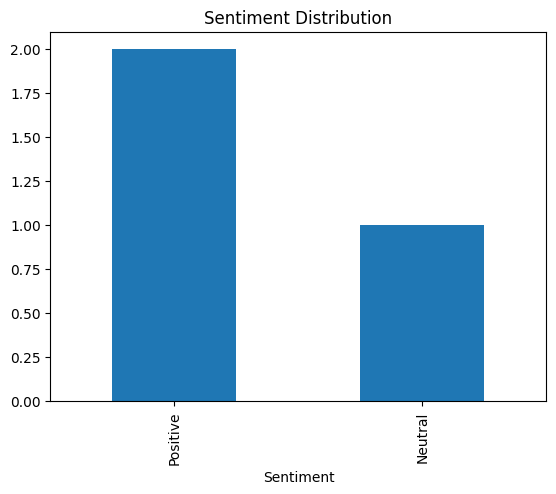

In [30]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.show()

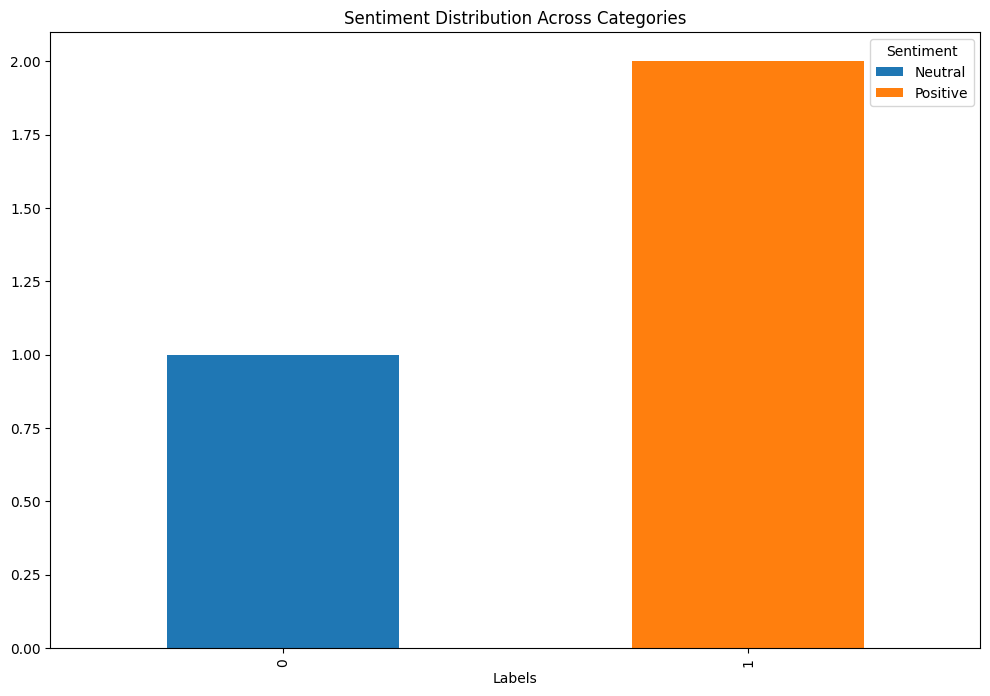

In [31]:
sentiment_category = df.groupby('Labels')['Sentiment'].value_counts().unstack()
sentiment_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution Across Categories')
plt.show()